## Data Analysis Report of Amazon Prime Movies and TV Shows

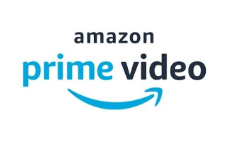

### Libraries required for exploratory data analysis and cleaning


##### -  pandas will be used to transform and manipulate the dataset/dataframes <code>pandas<code>
##### -  numpy  will be used to calculate statistics <code>numpy<code>
##### -  matplotlib  will be used to create plots <code>matplotlib.pyplot<code>
##### -  seaborn will be used to visualize data <code>seaborn<code>
##### -  sklearn will be used to create a regression model <code>LinearRegression<code>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



### Dataset Collection and Information

##### For this report I will be using the "[Amazon Prime Movies and TV Shows](https://www.kaggle.com/datasets/dgoenrique/amazon-prime-movies-and-tv-shows?select=credits.csv)"  datasets which were obtained from [Kaggle](https://www.kaggle.com/) The datasets consist of 2 csv files. 
##### The first file being the titles.csv which has information about the shows itself and the second dataset being the credits.csv file which has information about the actors/directors that worked on the shows.


#### 1 - Data Information


##### Reading the csv files into a dataframe using pandas and merging them so we can work with the dataset as one.

In [88]:
# Dataset of Amazon TV shows and movies with its details"
titles = pd.read_csv("titles.csv")
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10873 entries, 0 to 10872
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10873 non-null  object 
 1   title                 10873 non-null  object 
 2   type                  10873 non-null  object 
 3   description           10729 non-null  object 
 4   release_year          10873 non-null  int64  
 5   age_certification     3688 non-null   object 
 6   runtime               10873 non-null  int64  
 7   genres                10873 non-null  object 
 8   production_countries  10873 non-null  object 
 9   seasons               1551 non-null   float64
 10  imdb_id               10172 non-null  object 
 11  imdb_score            9765 non-null   float64
 12  imdb_votes            9753 non-null   float64
 13  tmdb_popularity       10302 non-null  float64
 14  tmdb_score            8747 non-null   float64
dtypes: float64(5), int6

In [89]:
#Dataset of the actors/directors/characters of the shows listed in the titles csv#
credits = pd.read_csv("credits.csv")
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140553 entries, 0 to 140552
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  140553 non-null  int64 
 1   id         140553 non-null  object
 2   name       140553 non-null  object
 3   character  122705 non-null  object
 4   role       140553 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [90]:
# Merging the dataframes into one dataframe so we have information about the movie/show in one dataframe#
# Inner join was used and "id" column on both tables were used as a primary key to obtain information for the specific show by id of the show#
titles_credits = titles.merge(credits, on = 'id', how = 'inner')
titles_credits

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,25020,James Stewart,George Bailey,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,26190,Donna Reed,Mary Hatch,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,25653,Lionel Barrymore,Mr. Potter,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,13301,Thomas Mitchell,Uncle Billy,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261,34171,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140548,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN,2616047,Barri Tsavaris,Jeni / Poki / Jojo / Chumli,ACTOR
140549,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN,2030678,Park Yerin,Frido / Tani,ACTOR
140550,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN,1378851,Bommie Han,Pinkfong / Rachel / Jordi,ACTOR
140551,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN,2762736,Sharon Youngmee,Billi / Baker,ACTOR


#### 2 - Data Cleaning

##### Data cleaning is the process of identifying and correcting errors, incossitencies, and inccuracies in the data to ensure accuracy and usefulness. 
##### For these datasets we will be removing duplicates, removing null data, standardizing data formats, and correcting misspelled data. 


#### Handling the genre and production countries columns so they're displayed as one value

In [91]:
# Removes the square brackets, single quotes, comma, and creates a new column called "genre" that has one single value for genre#
titles_credits['genres'] = titles_credits['genres'].str.replace('[','', regex = False).str.replace("'",'', regex = False).str.replace(']','', regex = False)
titles_credits['genres'] = titles_credits['genres'].str.split(',').str[0]

In [92]:
# Removes the square brackets, single quotes, comma, and changes the production_countries column so shows as one single value without brackets and commas#
titles_credits['production_countries'] = titles_credits['production_countries'].str.replace(r"[", '',regex = False).str.replace(r"'", '',regex = False).str.replace(r"]", '',regex = False)
titles_credits['production_countries'] = titles_credits['production_countries'].str.split(',').str[0]

In [93]:
titles_credits

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,NaN,tt0038650,8.6,467766.0,27.611,8.261,25020,James Stewart,George Bailey,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,NaN,tt0038650,8.6,467766.0,27.611,8.261,26190,Donna Reed,Mary Hatch,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,NaN,tt0038650,8.6,467766.0,27.611,8.261,25653,Lionel Barrymore,Mr. Potter,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,NaN,tt0038650,8.6,467766.0,27.611,8.261,13301,Thomas Mitchell,Uncle Billy,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,NaN,tt0038650,8.6,467766.0,27.611,8.261,34171,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140548,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,,,NaN,NaN,NaN,NaN,1.336,NaN,2616047,Barri Tsavaris,Jeni / Poki / Jojo / Chumli,ACTOR
140549,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,,,NaN,NaN,NaN,NaN,1.336,NaN,2030678,Park Yerin,Frido / Tani,ACTOR
140550,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,,,NaN,NaN,NaN,NaN,1.336,NaN,1378851,Bommie Han,Pinkfong / Rachel / Jordi,ACTOR
140551,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,,,NaN,NaN,NaN,NaN,1.336,NaN,2762736,Sharon Youngmee,Billi / Baker,ACTOR


#### Checking, replacing, and removing null/missing values

In [94]:
#Checking for null values#
titles_credits.isnull().sum()

id                           0
title                        0
type                         0
description                234
release_year                 0
age_certification        77503
runtime                      0
genres                       0
production_countries         0
seasons                 130973
imdb_id                   5727
imdb_score                6663
imdb_votes                6732
tmdb_popularity             22
tmdb_score                9994
person_id                    0
name                         0
character                17848
role                         0
dtype: int64

##### The null values or "NaN" actually represents 0 seasons so before we drop duplicates we need to make sure to represent that as 0 seasons.


In [95]:
# Replacing the null values for the 'season' column to 0 so they represent 0 seasons instead of being dropped#
titles_credits['seasons'].fillna(0, inplace = True)
titles_credits.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,25020,James Stewart,George Bailey,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,26190,Donna Reed,Mary Hatch,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,25653,Lionel Barrymore,Mr. Potter,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,13301,Thomas Mitchell,Uncle Billy,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,34171,Henry Travers,Clarence,ACTOR
5,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,27179,Beulah Bondi,Mrs. Bailey,ACTOR
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,13381,Frank Faylen,Ernie,ACTOR
7,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,13323,Ward Bond,Bert,ACTOR
8,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,39498,Gloria Grahame,Violet,ACTOR
9,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,27178,H.B. Warner,Mr. Gower,ACTOR


In [96]:
#Dropping null and missing values in the dataframe#
titles_credits = titles_credits.dropna()
titles_credits.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64

In [97]:
#Checking for duplicates#
titles_credits.duplicated(keep = False)

0         False
1         False
2         False
3         False
4         False
          ...  
140469    False
140470    False
140471    False
140472    False
140475    False
Length: 55721, dtype: bool

In [98]:
#Dropping all duplicate rows in the dataframe while keeping the first instance of each row#
titles_credits = titles_credits.drop_duplicates(keep = 'first')
titles_credits

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,25020,James Stewart,George Bailey,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,26190,Donna Reed,Mary Hatch,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,25653,Lionel Barrymore,Mr. Potter,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,13301,Thomas Mitchell,Uncle Billy,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,drama,US,0.0,tt0038650,8.6,467766.0,27.611,8.261,34171,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140469,tm948025,Hard Luck Love Song,MOVIE,"Jesse, a charismatic but down on his luck trou...",2023,R,104,drama,US,0.0,tt8709338,5.3,444.0,4.299,5.300,23918,Randal Reeder,Bump,ACTOR
140470,tm948025,Hard Luck Love Song,MOVIE,"Jesse, a charismatic but down on his luck trou...",2023,R,104,drama,US,0.0,tt8709338,5.3,444.0,4.299,5.300,1025963,Zac Badasci,Pete,ACTOR
140471,tm948025,Hard Luck Love Song,MOVIE,"Jesse, a charismatic but down on his luck trou...",2023,R,104,drama,US,0.0,tt8709338,5.3,444.0,4.299,5.300,23237,Max Arciniega,Medina,ACTOR
140472,tm948025,Hard Luck Love Song,MOVIE,"Jesse, a charismatic but down on his luck trou...",2023,R,104,drama,US,0.0,tt8709338,5.3,444.0,4.299,5.300,879790,Biff Wiff,The Guy in a 38-Special T-Shirt,ACTOR


### Exploratory Data Analysis 

#### For this section we will be looking at different variables to answers some questions.
#### 5 Questions of interest:
##### - What is the distribution of movie versus TV show titles?
##### - What are the most common generes and how are they distributed across titles?
##### - Are there any correlations between IMDb and TMDB scores?
##### - Which countries are most frequently involved in the production of these titles?
##### - Is there a correlation between runtime and popularity on TMDB

##### For these questions we are going to use the following columns and make sure their values are correct: <code>"type", "genres","title" ,"imdb_score","tmbd_score","production_countries", "runtime","tmdb_popularity" <code>

#### 1 - Describing the data

In [99]:
#Checking the summary statistic of the variables that are numeric to make sure any negative values are not present#
summary_stats = titles_credits.loc[:, ['imdb_score','tmdb_score','runtime', 'tmdb_popularity','release_year']].describe()
summary_stats

,imdb_score,tmdb_score,runtime,tmdb_popularity,release_year
count,55721.000000,55721.000000,55721.000000,55721.000000,55721.000000
mean,6.124052,6.200389,99.763626,18.106637,2004.541699
std,1.204835,1.157230,31.892121,39.546807,17.026951
min,1.300000,0.800000,1.000000,0.600000,1919.000000
25%,5.400000,5.581000,89.000000,4.491000,1996.000000
50%,6.200000,6.300000,98.000000,9.325000,2011.000000
75%,7.000000,7.000000,112.000000,16.925000,2017.000000
max,9.800000,10.000000,940.000000,949.606000,2023.000000


In [100]:
# Counting unique values for the non-numeric variables#
for col in ['type', 'genres', 'title', 'production_countries']:
    print(titles_credits[col].value_counts())

MOVIE    50982
SHOW      4739
Name: type, dtype: int64
drama            19975
comedy            9744
thriller          7277
action            4686
horror            3414
romance           1827
scifi             1532
crime             1510
western           1188
animation         1137
documentation     1080
fantasy            951
family             474
music              363
history            292
war                117
reality            112
                    41
sport                1
Name: genres, dtype: int64
The Wolf of Wall Street       139
Coming 2 America              136
An American Carol             135
Peterloo                      134
The Family                    130
                             ... 
Tom Green: Live                 1
Call Me Fitz                    1
Nick Cannon Mr. Showbiz         1
Underbelly                      1
Tim Allen: Rewires America      1
Name: title, Length: 3113, dtype: int64
US    34823
GB     5116
CA     2838
IN     1950
FR     1876
      .

#### 2 - Research Questions/Visualizations

##### This section will be dedicated to answering the research questions and visulizating different graphs to help answer the questions. We will be using the matplotlib and seaborn library to create different plots and find patterns/trends.

### Question 1 - What is the distribution of movie versus TV show titles?

<function matplotlib.pyplot.show(close=None, block=None)>

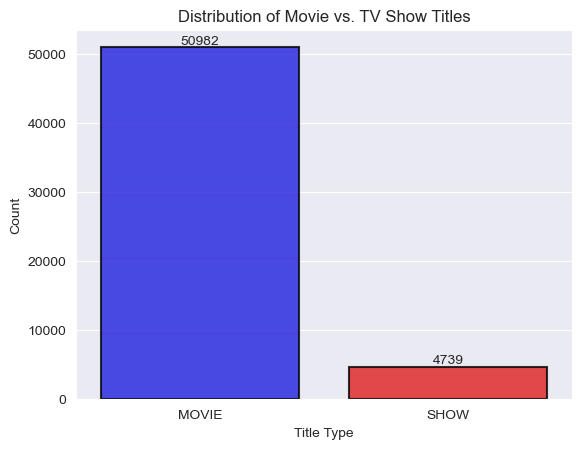

In [125]:
#Counting the number of movies and tv show titles into one variables
type_counts = titles_credits['type'].value_counts()

#creating a bar chart and adding labels/title
sns.set_style("darkgrid")
sns.barplot(x=type_counts.index, y=type_counts.values, color='blue', alpha=0.8, edgecolor='black', linewidth=1.5, palette = {'MOVIE': 'blue', 'SHOW': 'red'})
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.title('Distribution of Movie vs. TV Show Titles')

#Adding value labels on top of the bar
for i, bar in enumerate(bar_movie_show):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), str(type_counts.values[i]), ha='center', va='bottom')
    
plt.show

##### Based on the bar plot, it is evident that the number of movies is significantly greater than the number of TV shows. Specifically, there are 50,892 movies and 4,739 TV shows in the dataset.
##### We can go even further by analyzing a subgroup based on <code>"release_year'<code> 

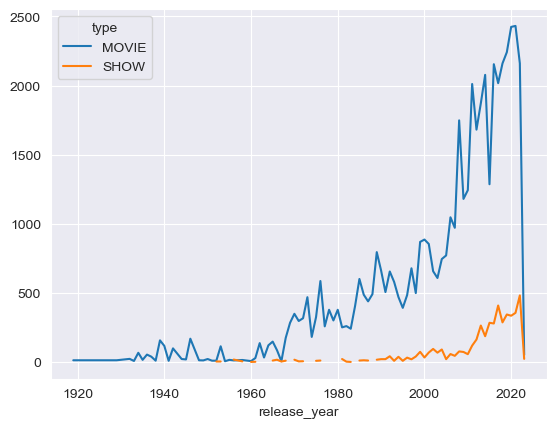

In [102]:
# Group titles by release year and type
year_counts = titles_credits.pivot_table(index='release_year', columns='type', values='title', aggfunc='count')

# Create a line plot for movie and TV show counts over time
year_counts.plot(kind='line')

# Set labels and title for the release year plot
ax.set_xlabel('Release Year')
ax.set_ylabel('Count')
ax.set_title('Distribution of Movie vs TV Show Titles over Time')

plt.show()

### Question 2 - What are the most common genres and how are they distributed across titles?

<function matplotlib.pyplot.show(close=None, block=None)>

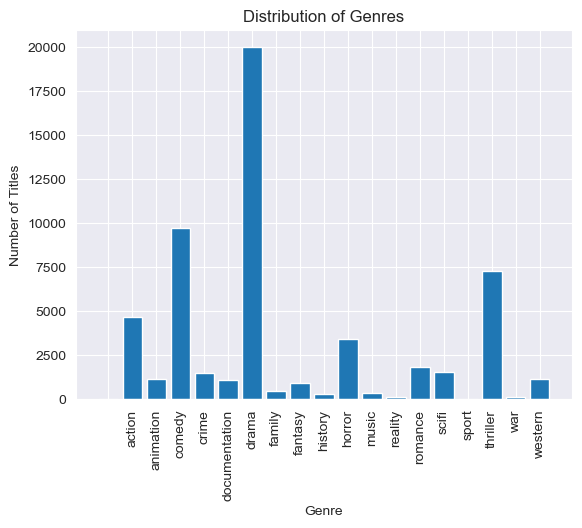

In [128]:
# Group the dataframe by genre and count the number of titles
genre_counts = titles_credits.groupby('genres')['title'].count()

# Create a bar chart of the genre counts
plt.bar(genre_counts.index, genre_counts.values)

# Add labels and titles to the chart
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Distribution of Genres')

#fix the x axis ticks so they're not cluttered and show the bar chart
plt.xticks(rotation=90)
plt.show

##### The bar graph indicates that the drama genre had the most titles, with approximately 20,000, while the war/reality genres had the fewest, with fewer than 1,000 titles. This graph also illustrates that the drama genre is the most popular genre, as no other genre has even half as many titles as the drama genre.

### Question 3 - Are there any correlations between IMDb and TMDB scores?

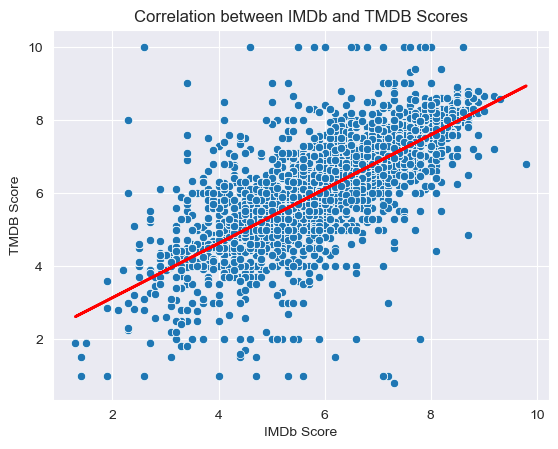

The correlation coefficient between imdb_score and tmdb_score is: 0.77


In [147]:
# create scatterplot
sns.scatterplot(x='imdb_score', y='tmdb_score', data=titles_credits)

# fit linear regression model
X = titles_credits['imdb_score'].values.reshape(-1, 1)
y = titles_credits['tmdb_score'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# predict values
y_pred = reg.predict(X)

# plot predicted values
plt.plot(X, y_pred, color='red', linewidth=2)

# set labels and title
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.title('Correlation between IMDb and TMDB Scores')

# show plot
plt.show()

#Obtaining a correlation coefficient value to understand the relationship better
corr = np.corrcoef(titles_credits['imdb_score'], titles_credits['tmdb_score'])[0, 1]

print(f"The correlation coefficient between imdb_score and tmdb_score is: {corr:.2f}")

##### - A correlation coefficient of 0.77 indicates a strong positive correlation between imdb_score and tmdb_score. 
##### - This means that as the imdb_score of a title increases, the tmdb_score tends to increase as well. 
##### - The scatter plot also shows a positive linear relationship between the two variables, with a mostly linear pattern of points. Overall, this suggests that there is a strong association between imdb_score and tmdb_score, and that they may be measuring similar aspects of the title's quality.
##### - However, there is also some variability in the data, with some titles having high scores on both platforms while some have low scores on both.

### Question 4 - Which countries are most frequently involved in the production of these titles?

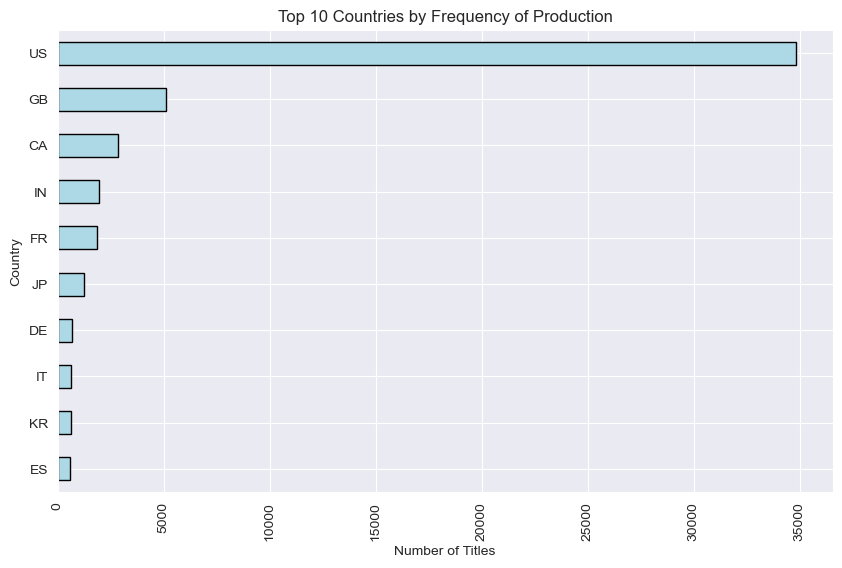

In [142]:
# Select the top 10 countries by frequency of production
top_countries = country_counts[:10]

# Create a horizontal bar plot of the top countries
ax = top_countries.plot(kind='barh', figsize=(10, 6), color='lightblue', edgecolor='black')

# Set axis labels and title
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries by Frequency of Production')

# Invert the y-axis to show countries in descending order
ax.invert_yaxis()

# Show the plot
plt.show()

##### This bar chart shows the number of titles produced by the top 10 countries. The highest number of titles are produced by the United States, with a count of 34,823. This is followed by Great Britain (5,116), Canada (2,838), India (1,950), and France (1,876). The remaining five countries in the top 10 include Japan, Germany, Italy, South Korea, and Spain, with production counts ranging from 591 to 1,223.

### Question 5 - What is the distribution of average runtime by genre?

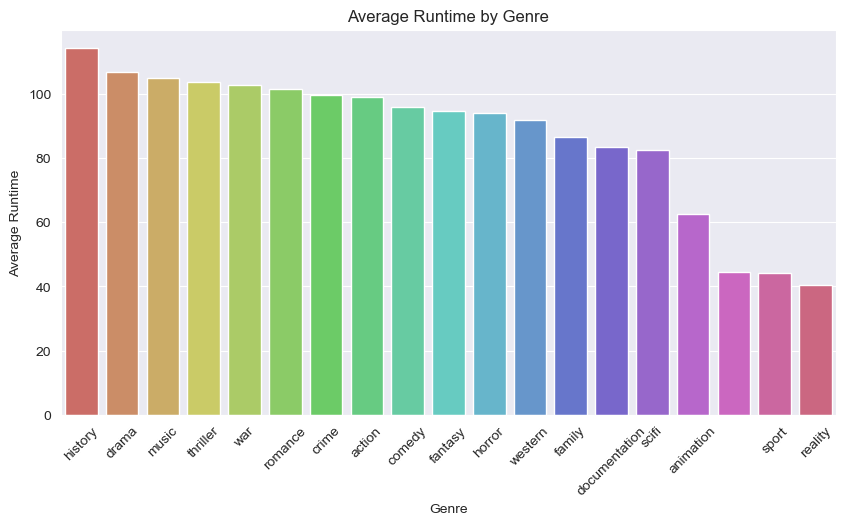

In [170]:
# group data by genre and calculate mean runtime
genre_mean_runtime = titles_credits.groupby('genres')['runtime'].mean()

# sort by descending mean runtime
genre_mean_runtime = genre_mean_runtime.sort_values(ascending=False)

# create bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=genre_mean_runtime.index, y=genre_mean_runtime.values, palette='hls')

# set labels and title
plt.xlabel('Genre')
plt.ylabel('Average Runtime')
plt.title('Average Runtime by Genre')

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# show plot
plt.show()

##### The bar plot clearly indicates that the 'history' genre boasts the highest average runtime among all genres, while the 'reality' genre stands at the bottom with the lowest average runtime. Interestingly, the drama, music, thriller, war, and romance genres follow closely with relatively similar average runtimes, making them the runner-ups.